In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
total_length = 100000
h_ratio = 0.4
o_amount = 24

In [ ]:
class OCX():
    def __init__(self):
        self.para = np.random.rand(25)
    def __call__(self, e1, e2, e3, e4, e5, i1, i2, i3):
        p = self.para
        arr = (
            (e1**(2*p[0])
            *(2+2*p[1]+(0.5+p[2])*e2)**(2*p[3])
            *(2+2*p[4]+(0.5+p[5])*e4)**(2*p[6])
            *(2+2*p[7]+(0.5+p[8])*i3)**(2*p[9])
            *np.sign(p[10]-0.5)+1)/2
            
            +(e1**(p[24])*(e5+1)
            *(2+2*p[15]+(0.5+p[16])*e3)**(2*p[17])
            *(3+2*p[18]+(0.5+p[19])*e4)**(2*p[20])
            *(4+2*p[21]+(0.5+p[22])*i3)**(2*p[23])
            *np.sign(p[10]-0.5)+1)/2
            
            +(np.sign(p[11]-0.5)+1)/2*(10*(2+p[12])*e2)*i1
            
            +(np.sign(p[13]-0.5)+1)/2*(10*(2+(1-p[12]))*e3)*i2
            
            +(1+p[14])*e1*e5
        )

        return arr

for i in range(o_amount):
    exec('OC' + str(i + 1) + ' = OCX()')

In [3]:
class OCX2():
    def __init__(self):
        self.para = np.random.rand(17)
    def __call__(self, e1, e2, e3, e4, e5, i1, i2, i3):
        p = self.para
        arr = (p[0]+p[1]*e1+p[2]*e2+p[3]*e3+p[4]*e4+p[5]*e5+p[6]*i1+p[7]*i2+p[8]*i3
                   +p[9]*e1**2+p[10]*e2**2+p[11]*e3**2+p[12]*e4**2+p[13]*e5**2+p[14]*i1**2+p[15]*i2**2+p[16]*i3**2)
        return arr

for i in range(o_amount):
    exec('OC' + str(i + 1) + ' = OCX2()')

In [4]:
def EC1(length):
    arr = [0]
    
    direction = 1
    status = 1
    gradient = 0.0001 + 0.0002*np.random.rand()
    steps = np.random.randint(1000, 2000)
    s = 0
    
    while s < length - 1:
        for i in range (steps):
            loc = arr[-1] + float(status*gradient) + 0.001 * np.random.normal()

            if loc <= 1 and loc>= 0:
                arr.append(loc)
                s += 1
                if s >= length - 1:
                    break
            else:
                direction = -direction
                break
        
        if status == 0:
            status = np.random.choice([-1,0,1], 1, p = [0.05,0,0.95])
        else:
            status = np.random.choice([-1,0,1], 1, p = [0.1,0.8,0.1])
        status = status*direction
                
        gradient = 0.0001 + 0.0002*np.random.rand()
        steps = np.random.randint(1000, 2000)
    
    arr = np.array(arr)
    return arr

In [5]:
def EC2(length):
    base = np.arange(length)
    arr = (.7*np.sin(np.pi/10000*base) + .3*np.sin(base/100) + 1)/2 + np.random.normal(size = [length])/50
    return arr

In [6]:
def EC3(length):
    base = np.arange(length)
    arr = (np.sin(base/1800 + np.random.normal(size = [length])/4) * 
           np.sin(base/400  + np.random.normal(size = [length])/4) + 1)/2 + np.random.normal(size = [length])/50
    return arr

In [7]:
def EC4(length):
    arr = [0]
    ran_step = np.random.normal(size = [length-1])/125
    for step in ran_step:
        loc = arr[-1] + step
        if loc<= 1 and loc >= 0:
            arr.append(loc)
        else:
            arr.append(arr[-1] - step)
    arr = np.array(arr)
    return arr

In [8]:
def EC5(length):
    arr = []
    s = 0
    while s < length:
        value = np.random.choice([0, 0.2, 0.4, 0.6, 0.8, 1.0], 1)
        steps = np.random.randint(1000, 4000)
        
        for i in range(steps):
            arr.append(float(value))
            s += 1
            if s >= length:
                break
    
    arr = np.array(arr)+ np.random.normal(size = [length])/100
    
    return arr

In [9]:
def IC(length, ratio):
    ratio2 = ratio+(1-ratio)*np.random.rand()
    arr = []
    starting_value = 0.7 + 0.3*np.random.rand()
    arr.append(starting_value)
    for i in range(int(ratio*length)-1):
        arr.append(arr[-1] + 0.001*(np.random.rand()-0.49999))
    
    for i in range(int(ratio2*length)-int(ratio*length)):
        loc = arr[-1] + 0.002*(np.random.rand()-0.505)
        if loc >= 0:
            arr.append(loc)
        else:
            arr.append(0)
    
    for i in range(length-int(ratio2*length)):
        loc = arr[-1] + 0.002*(np.random.rand()-0.52)
        if loc >= 0:
            arr.append(loc)
        else:
            arr.append(0)
    
    arr = np.array(arr)
    return arr

In [10]:
e1 = EC1(total_length)
e2 = EC2(total_length)
e3 = EC3(total_length)
e4 = EC4(total_length)
e5 = EC5(total_length)

i1 = IC(total_length, h_ratio)
i2 = IC(total_length, h_ratio)
i3 = IC(total_length, h_ratio)

In [11]:
for i in range(o_amount):
    exec('o' + str(i + 1) + ' = OC' + str(i + 1) + '(e1, e2, e3, e4, e5, i1, i2, i3)')

In [12]:
data = {}
for i in range(5):
    exec('data[\'E\' + str(i + 1)] = e' + str(i + 1))
for j in range(3):
    exec('data[\'I\' + str(j + 1)] = i' + str(j + 1))
for k in range(o_amount):
    exec('data[\'O\' + str(k + 1)] = o' + str(k + 1))

In [13]:
data_slim = {}
for i in range(3):
    exec('data_slim[\'E\' + str(i + 1)] = e' + str(i + 1) + '[:int(total_length * h_ratio)]')
for k in range(o_amount):
    exec('data_slim[\'O\' + str(k + 1)] = o' + str(k + 1) + '[:int(total_length * h_ratio)]')

data_slim_test = {}
for i in range(3):
    exec('data_slim_test[\'E\' + str(i + 1)] = e' + str(i + 1))
for k in range(o_amount):
    exec('data_slim_test[\'O\' + str(k + 1)] = o' + str(k + 1))

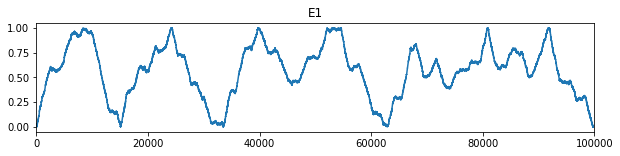

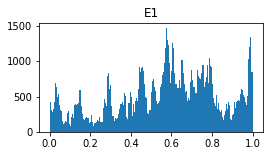

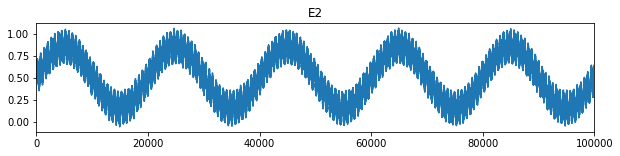

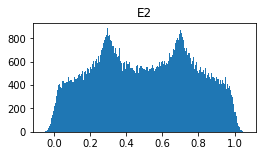

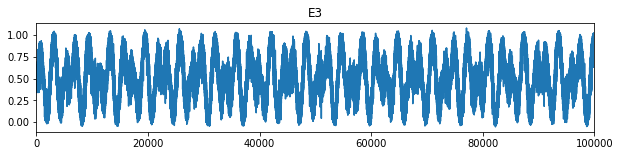

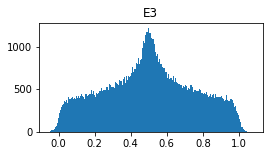

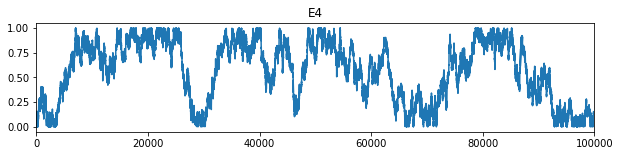

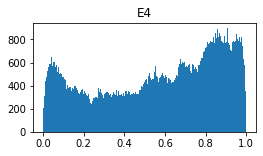

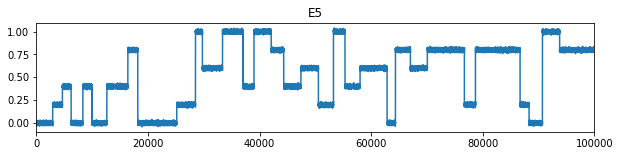

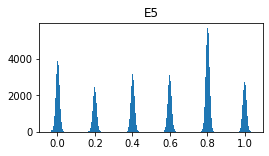

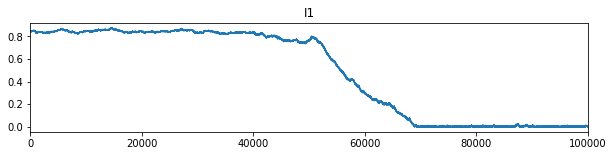

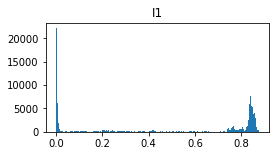

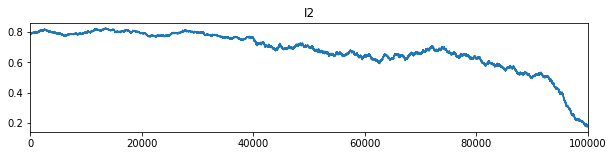

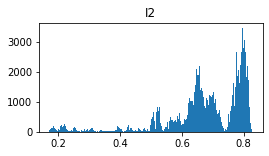

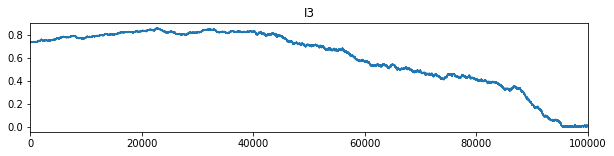

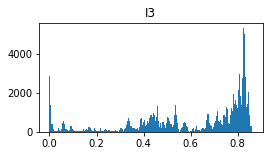

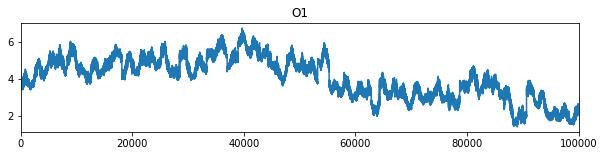

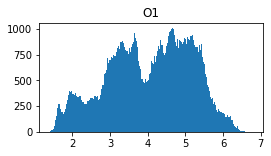

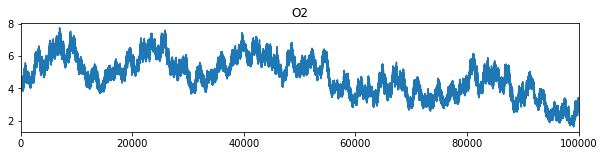

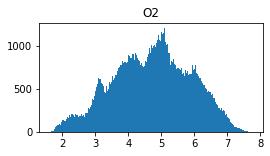

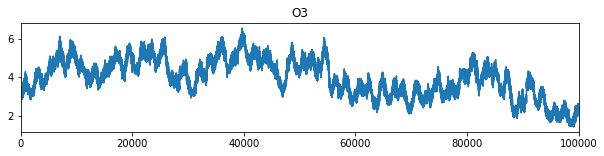

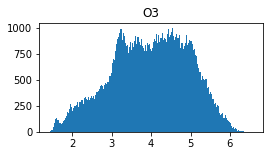

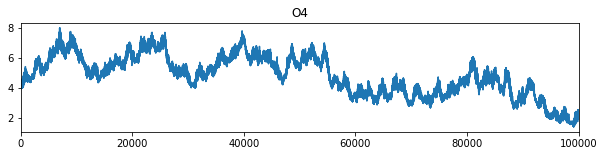

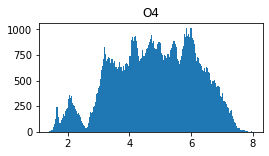

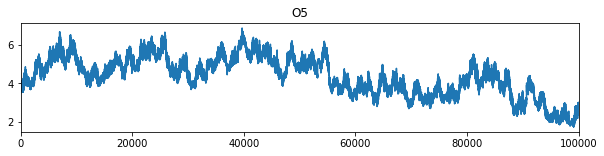

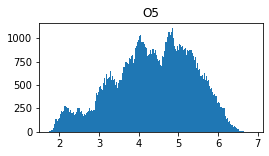

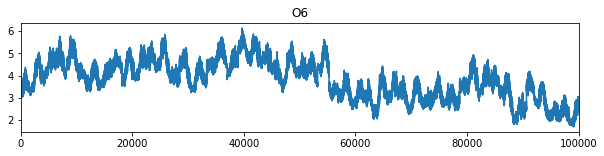

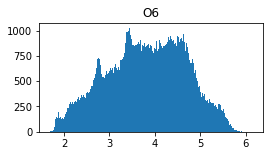

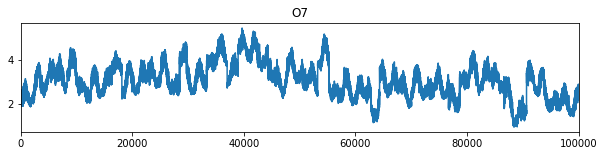

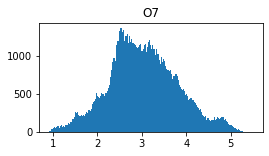

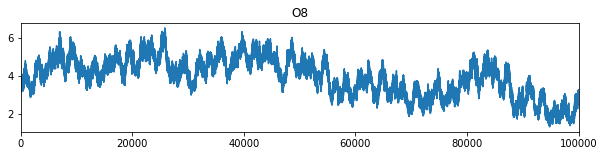

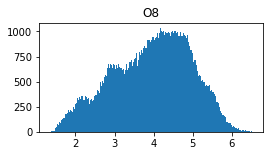

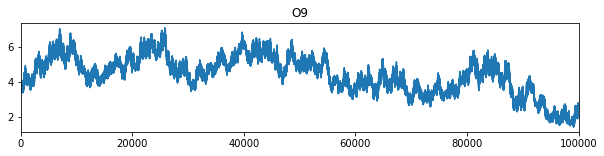

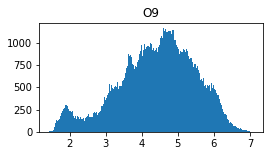

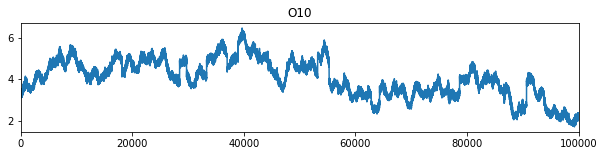

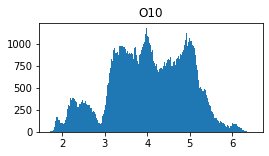

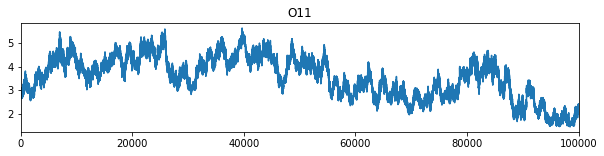

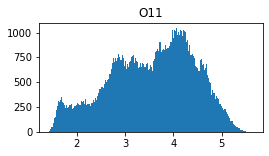

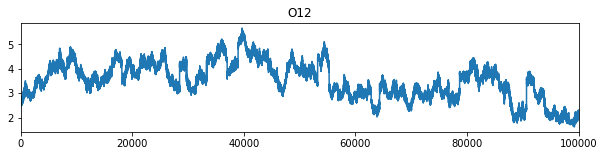

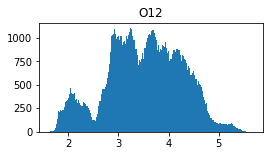

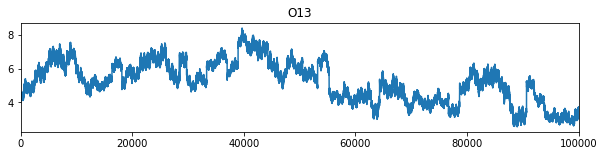

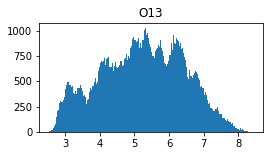

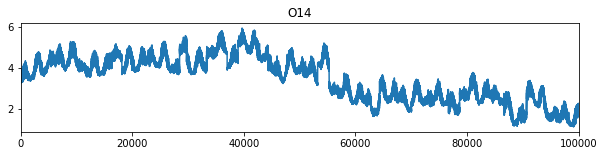

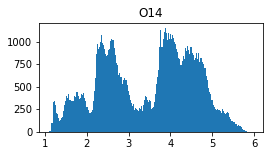

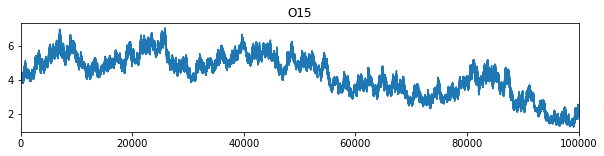

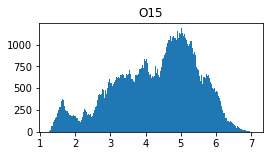

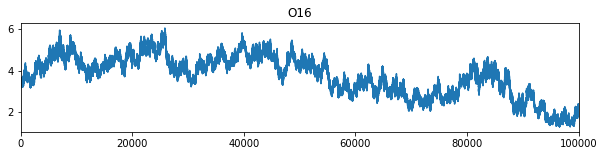

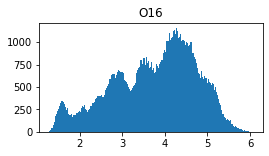

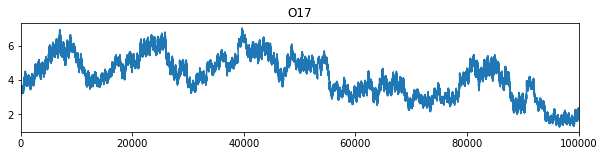

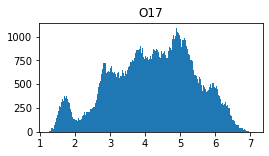

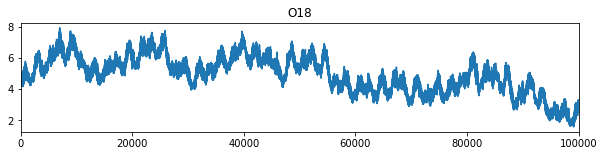

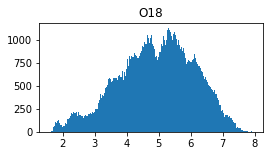

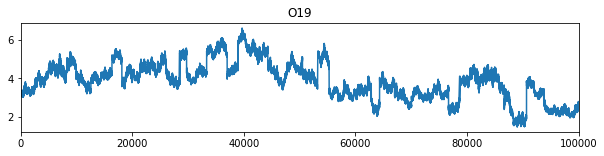

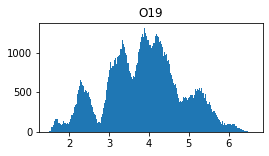

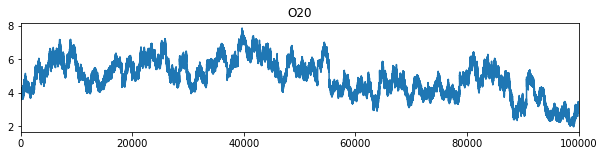

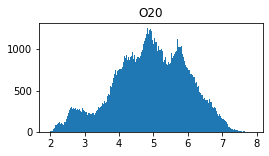

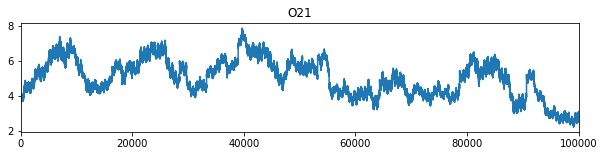

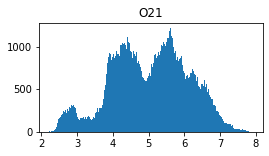

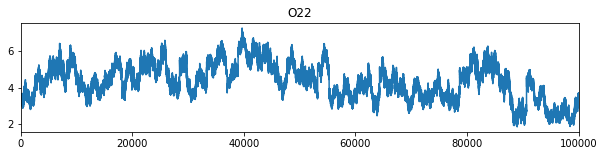

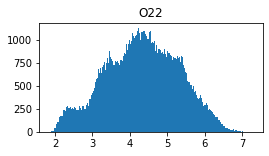

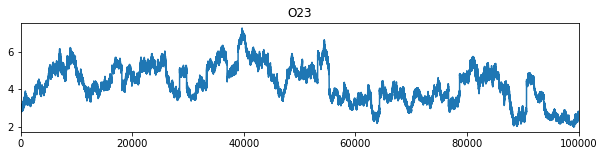

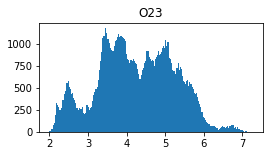

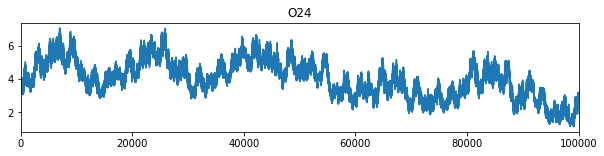

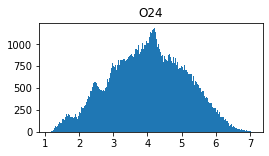

In [14]:
for arr in data:
    plt.figure(figsize = [10, 2])
    plt.plot(data[arr])
    plt.xlim(0, total_length)
    plt.title(arr)
    plt.show()
    
    plt.figure(figsize = [4, 2])
    plt.hist(data[arr], bins = 200)
    plt.title(arr)
    plt.show()

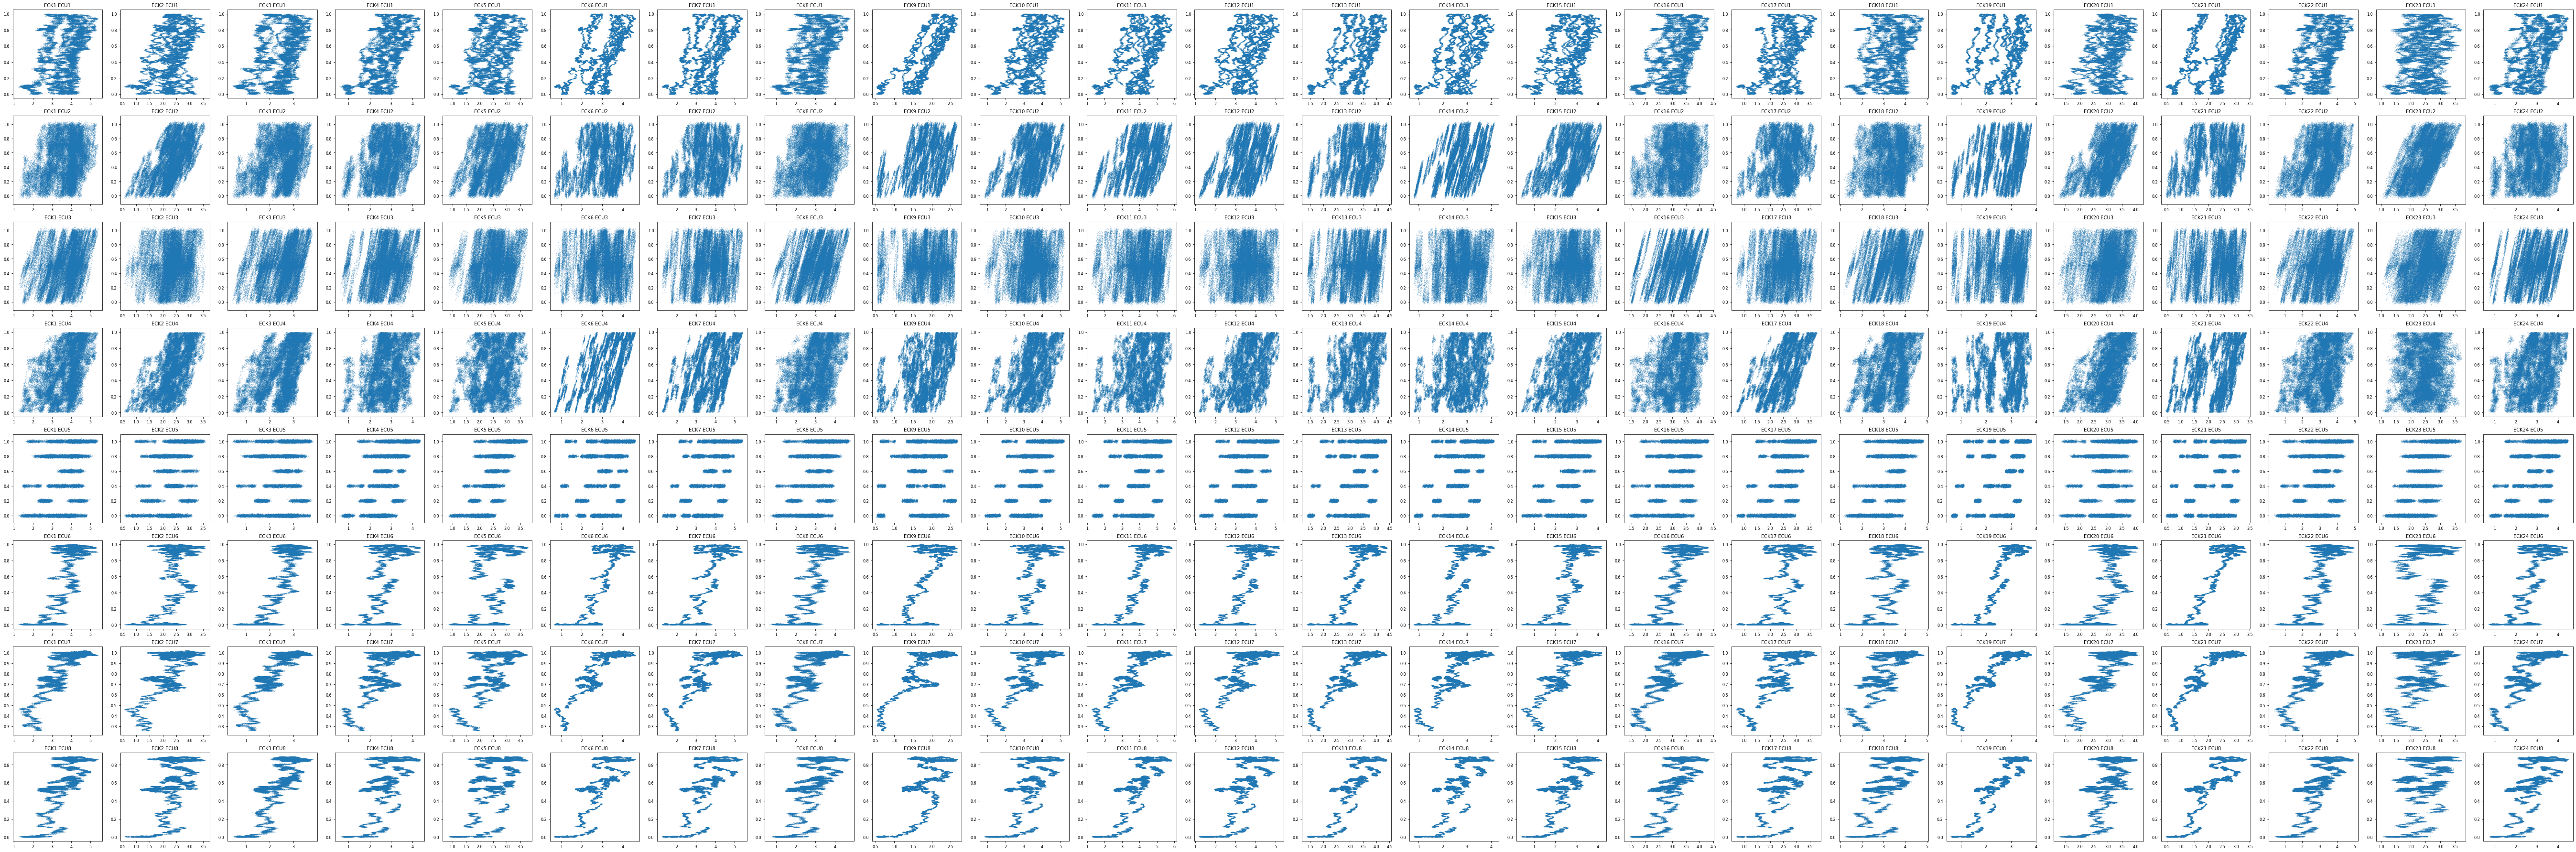

In [16]:
d = pd.DataFrame(data).values

fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(8, 24, figsize = [o_amount*4, 32])
for h in range (8):
    for h2 in range(o_amount):
        locals()['ax' + str(h)][h2].scatter(d[:,h2+8], d[:,h], s = 0.01)
        locals()['ax' + str(h)][h2].set_title("ECK"+str(h2+1)+' ECU'+str(h+1), fontsize = 10)
        locals()['ax' + str(h)][h2].tick_params(labelsize = 8)
plt.show()

In [15]:
pd.DataFrame(data).to_csv('Next_data.csv', index = False)
pd.read_csv('Next_data.csv')

E1        E2        E3        E4        E5        I1        I2  \
0      0.000000  0.487036  0.424374  0.000000  0.011136  0.841242  0.786293   
1      0.000183  0.492027  0.611079  0.004647  0.014991  0.841545  0.786417   
2      0.000194  0.522240  0.516015  0.013326 -0.000873  0.841877  0.786548   
3      0.001595  0.498103  0.534298  0.014112 -0.010867  0.841406  0.786075   
4      0.001993  0.518433  0.483058  0.013985 -0.010004  0.841157  0.786042   
...         ...       ...       ...       ...       ...       ...       ...   
99995  0.003173  0.621994  0.860638  0.016468  0.806407  0.002962  0.175370   
99996  0.003353  0.647447  0.854923  0.017755  0.792980  0.002123  0.175350   
99997  0.002841  0.647156  0.983519  0.011616  0.808758  0.001793  0.175083   
99998  0.001531  0.617713  0.967813  0.017753  0.809526  0.001974  0.174449   
99999  0.000528  0.602598  0.970177  0.032851  0.788967  0.002050  0.174294   

             I3        O1        O2  ...       O15       O16       O17  \
0      0.731328  3.386419  3.794957  ...  3.792228  3.137265  3.099371   
1      0.730856  3.604672  4.098435  ...  3.986910  3.300938  3.233138   
2      0.731094  3.496302  3.990427  ...  3.923235  3.254809  3.228356   
3      0.730780  3.494183  3.981366  ...  3.905804  3.235696  3.194786   
4      0.731155  3.448298  3.932354  ...  3.882639  3.218869  3.198217   
...         ...       ...       ...  ...       ...       ...       ...   
99995  0.005639  2.411191  3.133864  ...  2.340077  2.223962  2.242087   
99996  0.006016  2.398018  3.157635  ...  2.363680  2.244557  2.271906   
99997  0.004982  2.626719  3.435999  ...  2.583461  2.407388  2.393251   
99998  0.005668  2.585337  3.354164  ...  2.515054  2.352698  2.327715   
99999  0.005187  2.553963  3.328592  ...  2.496213  2.337668  2.289344   

            O18       O19       O20       O21       O22       O23       O24  
0      4.172174  3.029673  3.542589  3.569418  2.937920  2.749728  3.060715  
1      4.484812  3.143998  3.808008  3.688531  3.202761  2.896937  3.388220  
2      4.349975  3.098857  3.706160  3.676255  3.105185  2.836132  3.276236  
3      4.356749  3.080782  3.695416  3.645148  3.085730  2.827114  3.257174  
4      4.291717  3.068943  3.651604  3.647339  3.048162  2.803840  3.210535  
...         ...       ...       ...       ...       ...       ...       ...  
99995  2.995752  2.644181  3.228821  2.971454  3.443366  2.627459  2.871466  
99996  3.001899  2.631293  3.234689  2.991912  3.449649  2.616085  2.904810  
99997  3.299433  2.784617  3.476013  3.096565  3.704592  2.797610  3.218550  
99998  3.235250  2.743746  3.411205  3.039184  3.630063  2.757009  3.120175  
99999  3.222055  2.684887  3.369780  2.993797  3.571574  2.712725  3.091732  

[100000 rows x 32 columns]

In [18]:
pd.DataFrame(data_slim).to_csv('Next_data_slim.csv', index = False)
pd.read_csv('Next_data_slim.csv')
pd.DataFrame(data_slim_test).to_csv('Next_data_slim_test.csv', index = False)
pd.read_csv('Next_data_slim_test.csv')

E1        E2        E3        O1        O2        O3        O4  \
0      0.000000  0.524661  0.520328  3.773855  2.203727  2.377049  2.897230   
1      0.001709  0.515201  0.545865  3.784457  2.194816  2.393258  2.892341   
2      0.002222  0.540587  0.477521  3.739051  2.207639  2.357102  2.868768   
3      0.002010  0.489212  0.487972  3.728547  2.163148  2.347378  2.841910   
4      0.003634  0.520007  0.425878  3.700183  2.190083  2.321444  2.836673   
...         ...       ...       ...       ...       ...       ...       ...   
99995  0.099828  0.637492  0.937328  2.343854  1.505665  1.335371  1.711949   
99996  0.098528  0.612570  0.854536  2.257009  1.462429  1.271006  1.631565   
99997  0.101262  0.623845  0.890578  2.297668  1.482087  1.296147  1.678076   
99998  0.100285  0.611203  0.844735  2.249331  1.457586  1.254954  1.642588   
99999  0.101406  0.651848  0.948234  2.364320  1.525979  1.353201  1.729684   

             O5        O6        O7  ...       O15       O16       O17  \
0      2.964400  2.917566  3.680844  ...  2.748429  3.297238  2.533833   
1      2.949136  2.911827  3.670759  ...  2.736264  3.304940  2.525139   
2      2.941521  2.912652  3.664225  ...  2.750291  3.266450  2.518719   
3      2.907937  2.905626  3.655259  ...  2.709308  3.262118  2.512986   
4      2.919402  2.918603  3.665311  ...  2.738602  3.235106  2.521305   
...         ...       ...       ...  ...       ...       ...       ...   
99995  1.993201  1.144249  1.980897  ...  1.416834  2.147073  1.339093   
99996  1.926270  1.125408  1.943240  ...  1.377665  2.079666  1.308546   
99997  1.966851  1.137045  1.968522  ...  1.398881  2.114670  1.326733   
99998  1.941622  1.126137  1.952074  ...  1.379295  2.080678  1.313078   
99999  2.009878  1.154777  1.993735  ...  1.436967  2.158834  1.349189   

            O18       O19       O20       O21       O22       O23       O24  
0      3.673584  3.192668  2.842101  2.264050  3.239385  2.933718  3.042544  
1      3.673198  3.184683  2.843236  2.264244  3.244196  2.924256  3.043690  
2      3.630926  3.184296  2.840454  2.257098  3.210357  2.911021  3.006619  
3      3.630232  3.160388  2.807961  2.252599  3.179024  2.861885  2.999976  
4      3.607306  3.169547  2.816634  2.252896  3.164236  2.866572  2.978956  
...         ...       ...       ...       ...       ...       ...       ...  
99995  2.250044  1.123254  2.068492  0.832044  1.779215  2.394049  1.572766  
99996  2.172160  1.086462  2.022064  0.810236  1.683966  2.305873  1.497200  
99997  2.214913  1.109215  2.039888  0.822447  1.731436  2.353973  1.540997  
99998  2.178494  1.093775  2.010821  0.809518  1.681916  2.315951  1.505765  
99999  2.265240  1.132608  2.087048  0.840380  1.804710  2.415715  1.586554  

[100000 rows x 27 columns]

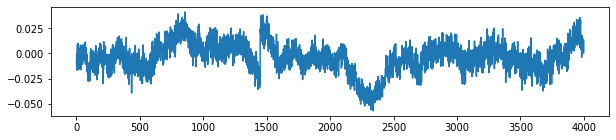

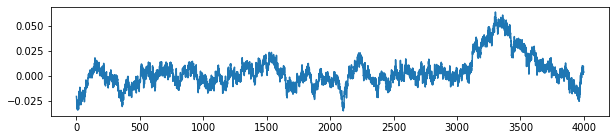

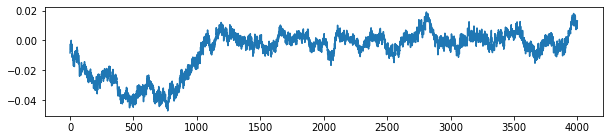

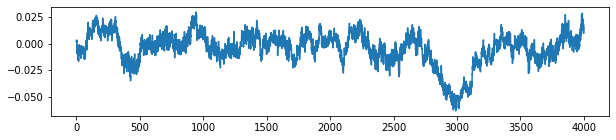

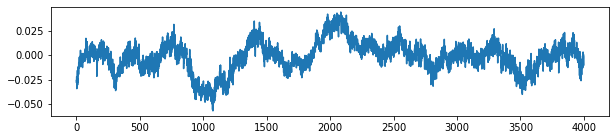

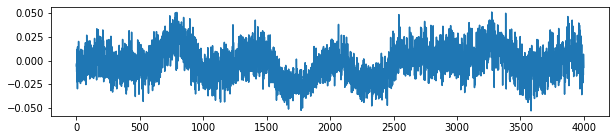

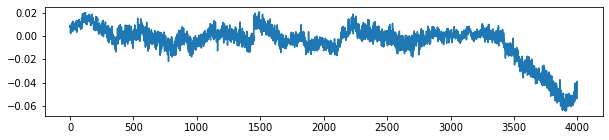

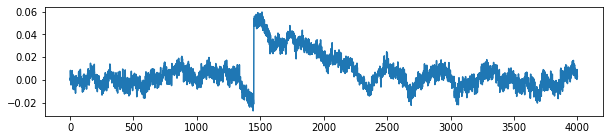

In [19]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components = 10)
S_ = ica.fit_transform(d[:4000,8:])
A_ = ica.mixing_  # Get estimated mixing matrix

for i in range(8):
    plt.figure(figsize = [10,2])
    plt.plot(S_[:,i])
    plt.show()